In [114]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
import pandas as pd

players   = pd.read_csv("../data/processed/players_bios_cleaned.csv")
mvp       = pd.read_csv("../data/processed/mvp_cleaned.csv")
per_game  = pd.read_csv("../data/processed/player_stats/per_game/2025.csv")

print(len(mvp), "MVPs")
print(f"{len(players):,} players  |  "
      f"{players['player_id'].nunique()} unique IDs")


70 MVPs
5,025 players  |  5025 unique IDs


In [116]:
#print out the rows with duplicated player IDs 
duplicates = players[players.duplicated(subset='player_id', keep=False)]
if not duplicates.empty:
    print("Duplicated player IDs found:")
    display(duplicates)
    

In [117]:
mvp_counts = mvp.groupby('player')['team'].value_counts().sort_values(ascending=False).reset_index(name='count')
print(f"{len(mvp_counts):,} players have won MVP awards")
display(mvp_counts.head(10))

41 players have won MVP awards


,player,team,count
0,Michael Jordan,CHI,5
1,Bill Russell,BOS,5
2,Kareem Abdul-Jabbar,LAL,3
3,Wilt Chamberlain,PHI,3
4,Larry Bird,BOS,3
5,Nikola Jokić,DEN,3
6,Magic Johnson,LAL,3
7,Kareem Abdul-Jabbar,MIL,3
8,Giannis Antetokounmpo,MIL,2
9,Karl Malone,UTA,2


In [118]:
# count how many times every (team, player) pair appears
mvp_counts = (
    mvp
      .groupby(['team', 'player'], as_index=False)       # keep both keys as columns
      .size()                                            # pandas ≥2.0; for <2.0 use .count()['season']
      .rename(columns={'size': 'mvp_count'})             # nicer column name
      .sort_values('mvp_count', ascending=False)         # most awards first
)

print(f"{mvp_counts['player'].nunique():,} players have won MVP awards")
display(mvp_counts.head(10))        # Jupyter-style display


37 players have won MVP awards


,team,player,mvp_count
7,CHI,Michael Jordan,5
1,BOS,Bill Russell,5
4,BOS,Larry Bird,3
32,PHI,Wilt Chamberlain,3
22,MIL,Kareem Abdul-Jabbar,3
11,DEN,Nikola Jokić,3
18,LAL,Magic Johnson,3
16,LAL,Kareem Abdul-Jabbar,3
20,MIA,LeBron James,2
15,HOU,Moses Malone,2


C:\Users\oukan\AppData\Local\Temp\ipykernel_58388\2836815594.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mvp_counts.index, y=mvp_counts.values, palette='viridis')


Text(0.5, 0, 'Player')

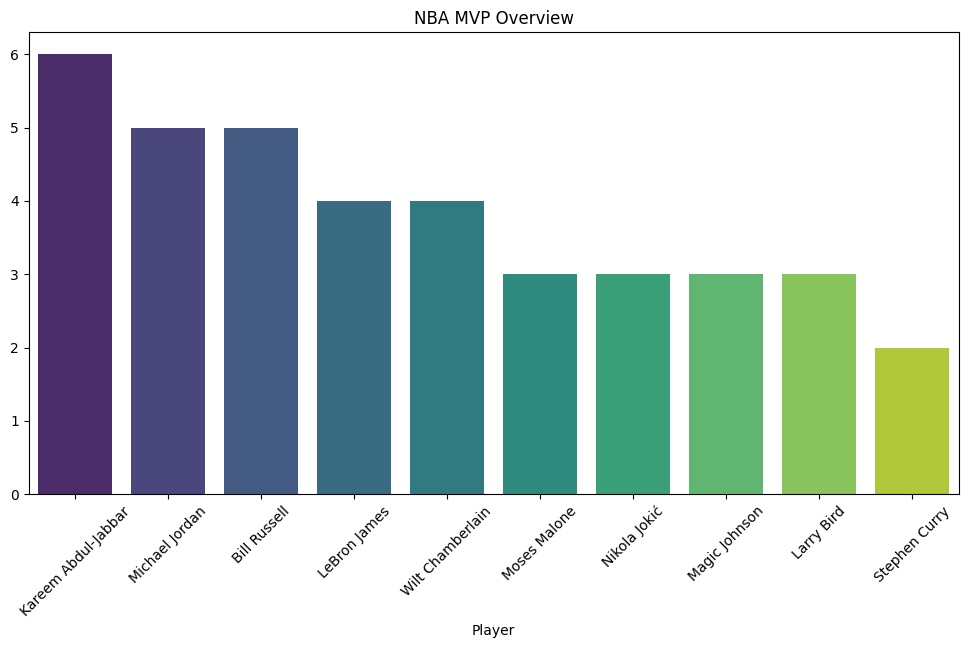

In [119]:
plot_settings = {
    'figsize': (12, 6),
    'title': 'NBA MVP Overview',
    'xlabel': 'Player',
    'ylabel': 'Count',
    'xticks_rotation': 45,
    }

# Plotting the MVP counts by player
mvp_counts = mvp['player'].value_counts().head(10)
plt.figure(figsize=plot_settings['figsize'])
sns.barplot(x=mvp_counts.index, y=mvp_counts.values, palette='viridis')
plt.xticks(rotation=plot_settings['xticks_rotation'])
plt.title(plot_settings['title'])
plt.xlabel(plot_settings['xlabel'])



C:\Users\oukan\AppData\Local\Temp\ipykernel_58388\2881599166.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mvp_per_position.index, y=mvp_per_position.values, palette='viridis')


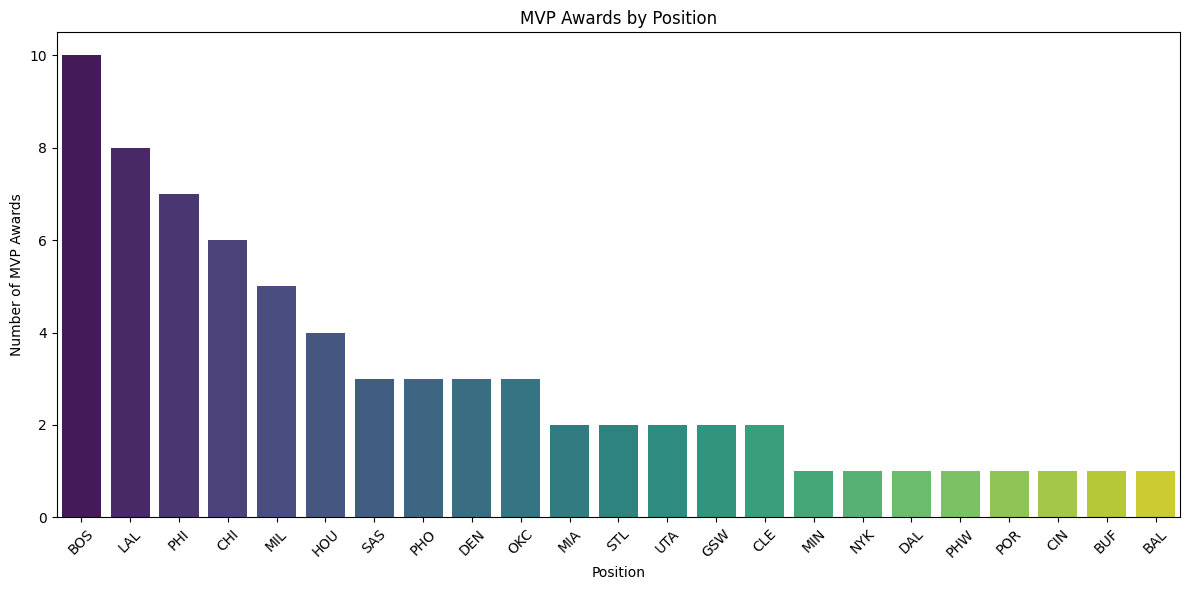

In [120]:
# Display the number of MVP awards won per team
mvp_per_position = mvp.groupby('team')['player'].count().sort_values(ascending=False)
plt.figure(figsize=plot_settings['figsize'])
sns.barplot(x=mvp_per_position.index, y=mvp_per_position.values, palette='viridis')
plt.title('MVP Awards by Position')
plt.xlabel('Position')
plt.ylabel('Number of MVP Awards')
plt.xticks(rotation=plot_settings['xticks_rotation'])
plt.tight_layout()
plt.show()


In [121]:
player_positions = players[['player', 'position_primary']].drop_duplicates(subset='player')

mvp_with_positions = mvp.merge(player_positions, on='player', how='left')

display(mvp_with_positions.head(20))

,season,lg,player,age,team,g,mp,pts,trb,ast,...,blk,fgpct,3ppct,ftpct,ws,ws_48,player_id,season_start,season_end,position_primary
0,2024-25,NBA,Shai Gilgeous-Alexander,26,OKC,76,34.2,32.7,5.0,6.4,...,1.0,0.519,0.375,0.898,16.7,0.309,gilgesh01,2024,2025,GUARD
1,2023-24,NBA,Nikola Jokić,28,DEN,79,34.6,26.4,12.4,9.0,...,0.9,0.583,0.359,0.817,17.0,0.299,jokicni01,2023,2024,CENTER
2,2022-23,NBA,Joel Embiid,28,PHI,66,34.6,33.1,10.2,4.2,...,1.7,0.548,0.330,0.857,12.3,0.259,embiijo01,2022,2023,CENTER
3,2021-22,NBA,Nikola Jokić,26,DEN,74,33.5,27.1,13.8,7.9,...,0.9,0.583,0.337,0.810,15.2,0.296,jokicni01,2021,2022,CENTER
4,2020-21,NBA,Nikola Jokić,25,DEN,72,34.6,26.4,10.8,8.3,...,0.7,0.566,0.388,0.868,15.6,0.301,jokicni01,2020,2021,CENTER
5,2019-20,NBA,Giannis Antetokounmpo,25,MIL,63,30.4,29.5,13.6,5.6,...,1.0,0.553,0.304,0.633,11.1,0.279,antetgi01,2019,2020,FORWARD
6,2018-19,NBA,Giannis Antetokounmpo,24,MIL,72,32.8,27.7,12.5,5.9,...,1.5,0.578,0.256,0.729,14.4,0.292,antetgi01,2018,2019,FORWARD
7,2017-18,NBA,James Harden,28,HOU,72,35.4,30.4,5.4,8.8,...,0.7,0.449,0.367,0.858,15.4,0.289,hardeja01,2017,2018,GUARD
8,2016-17,NBA,Russell Westbrook,28,OKC,81,34.6,31.6,10.7,10.4,...,0.4,0.425,0.343,0.845,13.1,0.224,westbru01,2016,2017,GUARD
9,2015-16,NBA,Stephen Curry,27,GSW,79,34.2,30.1,5.4,6.7,...,0.2,0.504,0.454,0.908,17.9,0.318,curryst01,2015,2016,GUARD


C:\Users\oukan\AppData\Local\Temp\ipykernel_58388\2596945314.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mvp_per_position.index, y=mvp_per_position.values, palette='viridis')


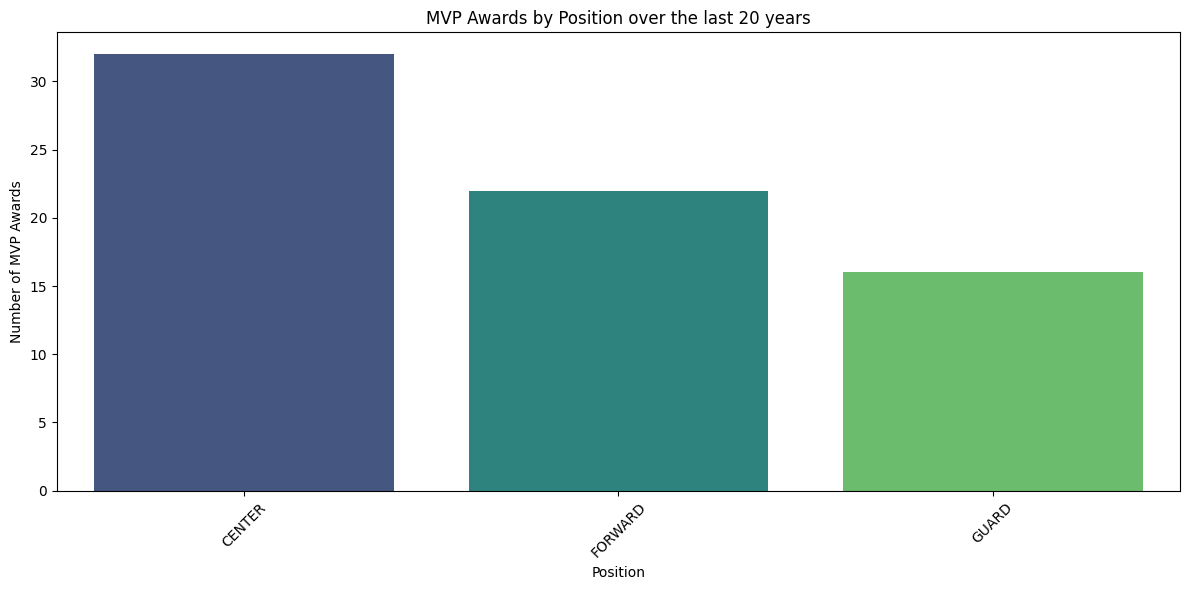

In [122]:
# Display the number of MVP awards won per team
mvp_per_position = mvp_with_positions.groupby('position_primary')['player'].count().sort_values(ascending=False)
plt.figure(figsize=plot_settings['figsize'])
sns.barplot(x=mvp_per_position.index, y=mvp_per_position.values, palette='viridis')
plt.title('MVP Awards by Position over the last 20 years')
plt.xlabel('Position')
plt.ylabel('Number of MVP Awards')
plt.xticks(rotation=plot_settings['xticks_rotation'])
plt.tight_layout()
plt.show()


C:\Users\oukan\AppData\Local\Temp\ipykernel_58388\2783819776.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


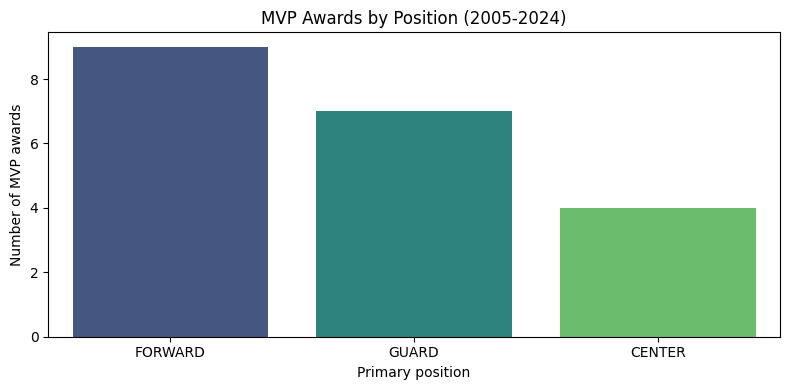

In [123]:
# ── restrict to the most recent 20 award years ───────────────────────
recent_start_year = mvp_with_positions["season_start"].max() - 19
recent_mvp        = mvp_with_positions[
    mvp_with_positions["season_start"] >= recent_start_year
]

# ── aggregate & plot ─────────────────────────────────────────────────
mvp_per_position = (
    recent_mvp.groupby("position_primary")["player"]
              .count()
              .sort_values(ascending=False)
)

plt.figure(figsize=(8, 4))
sns.barplot(
    x=mvp_per_position.index,
    y=mvp_per_position.values,
    palette="viridis"
)
plt.title(f"MVP Awards by Position ({recent_start_year}-{recent_mvp['season_start'].max()})")
plt.xlabel("Primary position")
plt.ylabel("Number of MVP awards")
plt.tight_layout()
plt.show()

In [124]:
# ── merge so each MVP row carries a birth year ──────────────
mvp_age = mvp.merge(players[["player", "birthdate"]], on="player", how="left")

# compute age in whole years
mvp_age["age"] = mvp_age["season_start"] - mvp_age["birthdate"].str[:4].astype(int)

# ── keep only the last 20 award seasons ─────────────────────
recent_start = mvp_age["season_start"].max() - 19
recent       = mvp_age[mvp_age["season_start"] >= recent_start]

display(recent.head(10))

,season,lg,player,age,team,g,mp,pts,trb,ast,...,blk,fgpct,3ppct,ftpct,ws,ws_48,player_id,season_start,season_end,birthdate
0,2024-25,NBA,Shai Gilgeous-Alexander,26,OKC,76,34.2,32.7,5.0,6.4,...,1.0,0.519,0.375,0.898,16.7,0.309,gilgesh01,2024,2025,1998-07-12
1,2023-24,NBA,Nikola Jokić,28,DEN,79,34.6,26.4,12.4,9.0,...,0.9,0.583,0.359,0.817,17.0,0.299,jokicni01,2023,2024,1995-02-19
2,2022-23,NBA,Joel Embiid,28,PHI,66,34.6,33.1,10.2,4.2,...,1.7,0.548,0.330,0.857,12.3,0.259,embiijo01,2022,2023,1994-03-16
3,2021-22,NBA,Nikola Jokić,26,DEN,74,33.5,27.1,13.8,7.9,...,0.9,0.583,0.337,0.810,15.2,0.296,jokicni01,2021,2022,1995-02-19
4,2020-21,NBA,Nikola Jokić,25,DEN,72,34.6,26.4,10.8,8.3,...,0.7,0.566,0.388,0.868,15.6,0.301,jokicni01,2020,2021,1995-02-19
5,2019-20,NBA,Giannis Antetokounmpo,25,MIL,63,30.4,29.5,13.6,5.6,...,1.0,0.553,0.304,0.633,11.1,0.279,antetgi01,2019,2020,1994-12-06
6,2018-19,NBA,Giannis Antetokounmpo,24,MIL,72,32.8,27.7,12.5,5.9,...,1.5,0.578,0.256,0.729,14.4,0.292,antetgi01,2018,2019,1994-12-06
7,2017-18,NBA,James Harden,28,HOU,72,35.4,30.4,5.4,8.8,...,0.7,0.449,0.367,0.858,15.4,0.289,hardeja01,2017,2018,1989-08-26
8,2016-17,NBA,Russell Westbrook,28,OKC,81,34.6,31.6,10.7,10.4,...,0.4,0.425,0.343,0.845,13.1,0.224,westbru01,2016,2017,1988-11-12
9,2015-16,NBA,Stephen Curry,27,GSW,79,34.2,30.1,5.4,6.7,...,0.2,0.504,0.454,0.908,17.9,0.318,curryst01,2015,2016,1988-03-14


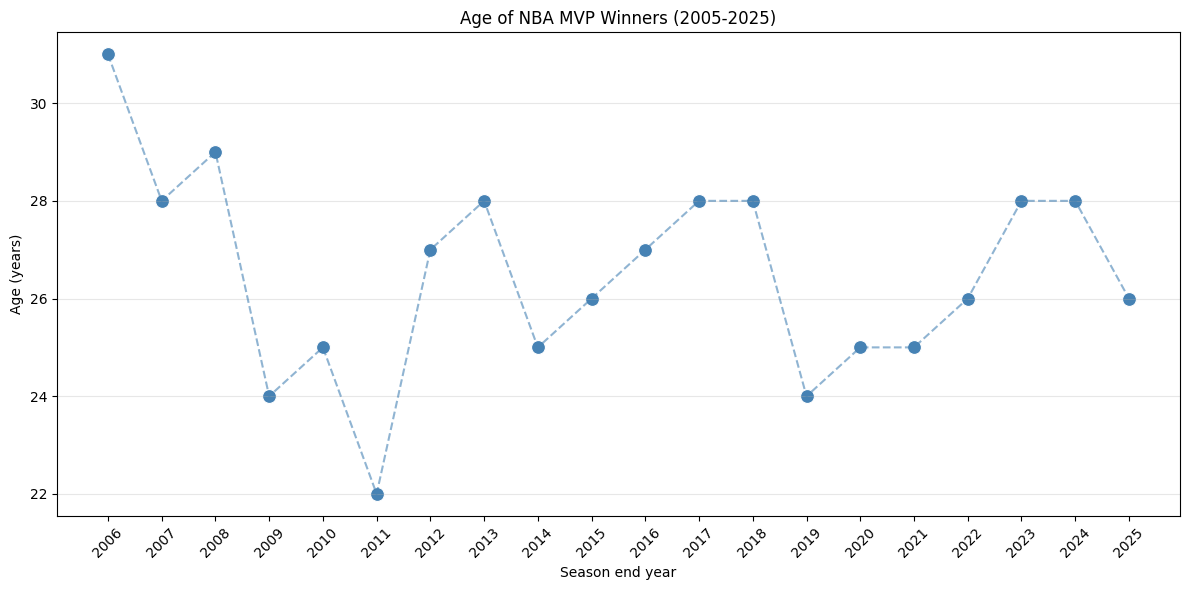

In [133]:
# derive season_end if it isn’t already present (’04-05 ⇒ 2005)
if "season_end" not in mvp.columns:
    mvp["season_end"] = mvp["season_start"] + 1

mvp_age = (
    mvp.merge(players[["player", "birthdate"]], on="player", how="left")
        .assign(age=lambda x: x["season_start"] - x["birthdate"].str[:4].astype(int))
)

# ── focus on the most recent 20 MVP seasons ────────────────────
recent_start = mvp_age["season_start"].max() - 19
recent = mvp_age[mvp_age["season_start"] >= recent_start]

# ── plot ───────────────────────────────────────────────────────
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=recent.sort_values("season_end"),
    x="season_end",
    y="age",
    s=100,
    color="steelblue"
)
sns.lineplot(
    data=recent.sort_values("season_end"),
    x="season_end",
    y="age",
    linestyle="--",
    color="steelblue",
    alpha=0.6
)

plt.title(f"Age of NBA MVP Winners ({recent_start}-{recent['season_end'].max()})")
plt.xlabel("Season end year")
plt.ylabel("Age (years)")
plt.xticks(recent["season_end"], rotation=45)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()
